# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Jair Francisco Flores Farfan  <br>
Url: https://github.com/jfloresf17/miar-viu/Algoritmos/Seminario<br>
Problema:
> 1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Combinar cifras y operaciones

Descripción del problema:(copiar enunciado)

....

(*) La respuesta es obligatoria


### Problema 1:
Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las
tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de
doblaje cobran toda la misma cantidad por cada día que deben desplazarse hasta el estudio de
grabación independientemente del número de tomas que se graben. No es posible grabar más
de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los
servicios de los actores de doblaje sea el menor posible.


                                        

In [1]:
import pandas as pd # Para manipular dataframes
import numpy as np # Para manipular arreglos de datos
import random # Para añadir aleatoriedad a los datos
import time # Para medir el tiempo de ejecución del algoritmo
import matplotlib.pyplot as plt # Para graficar la complejidad del algoritmo

from scipy.optimize import curve_fit # Para graficar la complejidad del algoritmo
from math import comb # Para calcular numéricamente el espacio de posible soluciones
from functools import lru_cache # Para medir el tiempo de ejecución
from typing import List
from itertools import combinations

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




Respuesta

Tenemos un total de 30 tomas con 10 actores, en donde cada actor tiene establecidas las tomas en las que participa junto a otros actores.

Sin aplicar restricciones se puede definir como número máximo de tomas por día al número total de tomas (n = 30). En base a ello la definición del espacio de posibilidades se denota de manera recursiva de la siguiente manera:

$P(n, max_{tomas}) = \sum_{j=1}^{min(n, max_{tomas})} C(n, j) * P(n-j, max_{tomas})$

Donde:
- $P(n, max_{tomas})$ es el número de posibilidades de formar grupos de n elementos con un máximo de tomas $max_{tomas}$.
- $C(n, j)$ es el número de combinaciones de n elementos tomados de j en j. 
Se calcula como $C(n, j) = \frac{n!}{j! \times (n-j)!}$
- $P(n-j, max_{tomas})$ es el número de particiones de los n-j elementos restantes.

La suma itera sobre todos los posibles tamaños de grupo j, desde 1 hasta el mínimo entre n y el máximo de tomas permitidas $max_{tomas}$.

In [2]:
def partition_count(n: int, max_tomas: int = 6) -> int:
    """
    Calcula el número de particiones posibles de n elementos en grupos de hasta max_tomas usando la 
    ecuación:
    P(n, max_tomas) = sum_{j=1}^{min(n, max_tomas)} C(n, j) * P(n-j, max_tomas)
    con la condición base P(0, max_tomas) = 1.

    Args:
    n (int): Número de elementos a particionar en grupos.
    max_tomas (int): Número máximo de elementos por grupo.

    Returns:
    int: Número de particiones posibles de n elementos en grupos de hasta max_tomas.    
    """
    @lru_cache(None)  # Memorización para evitar cálculos repetidos
    def P(n):
        if n == 0:
            return 1  # Caso base
        
        # Cálculo recursivo en donde se consideran todas las posibles combinaciones de j tomas
        return sum(comb(n, j) * P(n - j) for j in range(1, min(n, max_tomas) + 1))
    
    return P(n)

In [3]:
# Tomando como ejemplo el caso de 30 elementos en grupos de hasta 30
no_restriction_partitions = partition_count(n=30, max_tomas=30)
print(f"El espacio de posibles soluciones sin restricciones es de:")
print("")
print(f"{no_restriction_partitions}")

El espacio de posibles soluciones sin restricciones es de:

11403568794011880483742464196184901963


Si se toman en cuenta todas las restricciones en donde se tiene un máximo de 6 tomas por día, se debe "particionar" las tomas totales en grupos de máximo 6 tomas por día. El espacio de posibilidades, como es de esperar, se reduce. 

In [4]:
# Calcular el número de particiones para 30 tomas con un máximo de 6 en cada grupo
restriction_partitions = partition_count(n=30, max_tomas=6)
print(f"El espacio de posibles soluciones con restricciones es de:")
print("")
print(f"{restriction_partitions}")

El espacio de posibles soluciones con restricciones es de:

11400192964820635839099878586991366320


Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, argumentalo)


Respuesta

La estructura de datos que he elegido como entrada es un dataframe. Se representa como una tabla tiene en el eje "x" los actores y en el eje "y" las tomas que se realizan. En cada registro indica si el actor participa o no en esa escena (con 1 o 0 respectivamente).

In [5]:
df = pd.read_csv('doblaje.csv', header=1, index_col=0, sep=',')

# Eliminar las dos últimas columnas
df.drop(df.columns[-2:], axis=1, inplace=True) 
## Eliminar las dos últimas filas
df.drop(df.index[-2:], axis=0, inplace=True)

# Cambiar los nombres de las columnas y filas
df.columns = ['Actor_' + str(int(col)) for col in df.columns]
df.index = ['Toma_' + str(idx) for idx in df.index]
display(df)

,Actor_1,Actor_2,Actor_3,Actor_4,Actor_5,Actor_6,Actor_7,Actor_8,Actor_9,Actor_10
Toma_1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Toma_2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Toma_3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Toma_4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Toma_5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Toma_6,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Toma_7,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Toma_8,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Toma_9,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Toma_10,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta

La función objetivo es **minimizar el coste total** de la coordinación de las sesiones de doblaje. Específicamente, para cada día se incurre en un coste equivalente al número de actores que deben presentarse en el estudio (ya que se les paga una vez por día, independientemente del número de tomas grabadas).

La función objetivo es de minimización, la cual se define como:

$min (\sum_{d=1}^{D} \sum_{a=1}^{10} y_{a,d})$

En donde D es el número de días en los que se graban las tomas, que va de entre 30 a 5, ya que se pueden grabar como máximo 6 tomas por día.

$y_{a,d}$ es una variable binaria que indica si el actor a debe presentarse en el día d. Por ejemplo, si el actor 1 debe presentarse en los días 1, 2 y 3, entonces $y_{1,1} = 1$, $y_{1,2} = 1$ y $y_{1,3} = 1$.

In [6]:
def funcion_coste(dataframe: pd.DataFrame, group_lists: List[List[int]]) -> float:
    """
    Calcula el coste de una partición de tomas en grupos que es igual a la cantidad total de actores 
    involucrados en cada uno de los días de grabación (grupos).

    Args:
        dataframe (pd.DataFrame): DataFrame con las tomas y los actores que participan en cada una.
        group_lists (List[List[int]]): Lista de grupos de tomas (cada grupo representa un día).

    Returns:
        float: Coste total de la partición de acuerdo a la función objetivo (número total de asistencias).
    """
    
    actor_count_per_group = {}

    # Iterar sobre los grupos (días de grabación)
    for i, groups in enumerate(group_lists):
        actor_count_per_group[i] = set()  # Usar un conjunto para contar actores únicos por día
        
        if isinstance(groups, int):  # Asegurar que siempre sea una lista
            groups = [groups]            
        
        for group in groups:
            toma_index = f'Toma_{group}'  # Convertir número de toma al formato del DataFrame
            if toma_index in dataframe.index:
                # Obtener actores presentes en la toma (donde el valor es 1)
                group_actors = dataframe.columns[dataframe.loc[toma_index] == 1].tolist()

                # Agregar actores al conjunto de este día
                actor_count_per_group[i].update(group_actors)

    # Calcular el coste total: número de actores presentes en todos los días
    total_cost = sum(len(actores) for actores in actor_count_per_group.values())

    return total_cost, actor_count_per_group

La minimización de la función objetivo implica que se deben de tener todas las particiones posibles de las tomas en grupos de máximo 6 tomas por día, de esa manera se puede encontrar la combinación que minimice el coste total.

In [7]:
## Genera una lista de listas con las treinta tomas divididas en grupos de hasta seis tomas

## Ejemplo de la partición de tomas en 6 grupos (días de grabación)
lista = [
         [1, 2], # Día 1 
         [3, 4, 5, 29], # Día 2
         [7, 8, 14, 16, 11, 12], # Día 3 
         [13, 9, 15, 10, 17, 18], # Día 4
         [19, 22, 21, 20, 23, 24], # Día 5
         [25, 26, 27, 28, 6, 30] # Día 6
        ]

## Calcula el coste de la partición
cost, actor_count_per_group = funcion_coste(df, lista)
print(f"El coste de la partición de grupos es: {cost}")

El coste de la partición de grupos es: 42


Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

El algoritmo de fuerza bruta consiste en generar todas las posibles combinaciones de las tomas en grupos de máximo 6 tomas por día, para satisfacer las restricciones del problema se utiliza la técnica de backtracking. Posterior a ello, se calcula el coste total de cada combinación y se selecciona la que minimice el coste total.

Como es de esperar, el orden de complejidad del algoritmo pasa a ser exponencial $O(2^n)$, donde n es el número de tomas. Por lo tanto, este algoritmo es altamente costoso computacionalmente y no es viable para un número grande de tomas.

In [8]:
def fuerza_bruta(n: int, max_tomas: int = 6):
    """
    Genera todas las particiones posibles de n elementos en grupos de hasta max_tomas.
    Luego, selecciona la partición con el menor coste en función de la asistencia de actores.
    
    Args:
        n (int): Número total de tomas.
        max_tomas (int): Número máximo de tomas por grupo (día de grabación).

    Returns:
        tuple: (Mejor partición encontrada, Costo mínimo)
    """
    def backtrack(remaining: List[int], current_partition: List[List[int]]) -> None:  # Útil para la satisfacción de restricciones
        """        
        Backtracking para generar todas las particiones posibles de las tomas.

        Args:
            remaining (List[int]): Lista de tomas restantes por asignar.
            current_partition (List[List[int]]): Partición actual de las tomas.
        """
        
        if not remaining:
            partitions.append(current_partition)
            return

        for size in range(1, min(len(remaining), max_tomas) + 1):
            for group in combinations(remaining, size):
                next_remaining = [x for x in remaining if x not in group]
                backtrack(next_remaining, current_partition + [list(group)])

    partitions = []
    elements = list(range(1, n + 1))  # Tomando en cuenta que las tomas van de 1 a n
    backtrack(elements, [])

    # Evaluar el costo de cada partición y seleccionar la mejor
    mejor_particion = None
    costo_minimo = float('inf')

    for partition in partitions:
        costo, _ = funcion_coste(df, partition)
        if costo < costo_minimo:
            costo_minimo = costo
            mejor_particion = partition

    return mejor_particion, costo_minimo

Es por ello que lo más razonable es realizar una búsqueda aleatoria (por ejemplo un conjunto de 3000 soluciones aleatorias) y seleccionar la que tenga el menor coste total.

In [10]:
def particiones_aleatorias(n: int, max_tomas: int = 6, max_partitions: int = 3000) -> List[List[List[int]]]:
    """
    Genera "max_partitions" particiones de n elementos en grupos de "hasta max_tomas" tomas.

    Args:
        n (int): Número total de tomas.
        max_tomas (int): Número máximo de tomas por grupo.
        max_partitions (int): Número máximo de particiones a generar.

    Returns:
        List[List[List[int]]]: Lista con las primeras 1000 particiones generadas.
    """
    def backtrack(remaining: List[int], current_partition: List[List[int]]) -> None:  # Útil para la satisfacción de restricciones
        """        
        Backtracking para generar todas las particiones posibles de las tomas.

        Args:
            remaining (List[int]): Lista de tomas restantes por asignar.
            current_partition (List[List[int]]): Partición actual de las tomas.
        """

        # Si ya tenemos suficientes soluciones, detener
        if len(partitions) >= max_partitions:
            return

        # Si no quedan elementos, guardar la partición
        if not remaining:
            partitions.append(current_partition[:])
            return

        # Distribuir elementos en grupos de hasta "max_tomas" tomas
        for size in range(min(max_tomas, len(remaining)), 0, -1):
            for group in combinations(remaining, size):
                next_remaining = [x for x in remaining if x not in group]
                current_partition.append(list(group))
                backtrack(next_remaining, current_partition)
                current_partition.pop()  # Deshacer la última asignación para probar otras opciones

    partitions = []
    elements = list(range(1, n + 1))  # Lista de tomas de 1 a n
    random.shuffle(elements)  # Aleatorizar la lista de tomas
    backtrack(elements, [])

    return partitions

In [11]:
## Genera 3000 particiones aleatorias de 30 tomas en grupos de hasta 6 tomas
partitions = particiones_aleatorias(n=30, max_tomas=6, max_partitions=3000)

## Encuentra la partición con el menor coste
min_cost = float('inf')
for i, partition in enumerate(partitions):
    cost, _ = funcion_coste(df, partition)
    if cost < min_cost:
        min_cost = cost
        best_partition = partition

for i, dia in enumerate(best_partition):
    print(f" Día {i+1}: tomas {dia}")
print("\nCoste total mínimo:", min_cost)

 Día 1: tomas [29, 6, 13, 17, 5, 3]
 Día 2: tomas [18, 1, 27, 14, 30, 7]
 Día 3: tomas [20, 19, 26, 10, 24, 16]
 Día 4: tomas [4, 9, 21, 2, 28, 25]
 Día 5: tomas [23, 8, 12, 15, 22, 11]

Coste total mínimo: 39


(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

Un algoritmo de búsqueda local puede mejorar la complejidad del algoritmo de fuerza bruta. La idea es partir de una solución inicial y realizar pequeños cambios en la solución para mejorarla. 

Estos cambios se llaman operadores de vecindad y consisten en elegir una toma en dos grupos de tomas aleatorios e intercambiarlo de un grupo por una del otro grupo.

In [12]:
# Función de búsqueda local para mejorar la partición
def busqueda_local(df, best_partition, min_cost, max_iter=100):
    """
    Optimiza la partición encontrada usando búsqueda local.

    Args:
        df (pd.DataFrame): DataFrame con la matriz de asistencia de actores a tomas.
        best_partition (List[List[int]]): La mejor partición inicial encontrada.
        min_cost (float): Costo de la mejor partición encontrada.
        max_iter (int): Número máximo de iteraciones en la búsqueda local.

    Returns:
        tuple: (Mejor partición encontrada, Costo mínimo alcanzado)
    """
    current_partition = best_partition[:]
    current_cost = min_cost

    for _ in range(max_iter):
        new_partition = [group[:] for group in current_partition]  # Copia profunda de la partición
        if len(new_partition) < 2:
            break  # No se puede optimizar si hay menos de dos grupos

        # Elegir dos grupos aleatorios para intercambiar elementos
        g1, g2 = random.sample(range(len(new_partition)), 2)
        if not new_partition[g1] or not new_partition[g2]:
            continue  # Evitar grupos vacíos

        # Intercambiar una toma entre los grupos seleccionados
        if new_partition[g1] and new_partition[g2]:
            swap_idx1 = random.randint(0, len(new_partition[g1]) - 1)
            swap_idx2 = random.randint(0, len(new_partition[g2]) - 1)

            new_partition[g1][swap_idx1], new_partition[g2][swap_idx2] = (
                new_partition[g2][swap_idx2],
                new_partition[g1][swap_idx1],
            )

        # Calcular nuevo costo
        new_cost, _ = funcion_coste(df, new_partition)

        # Si la nueva partición mejora el costo, actualizar
        if new_cost < current_cost:
            current_partition = new_partition
            current_cost = new_cost

    return current_partition, current_cost

In [13]:
# Ejecutar la búsqueda local sobre la mejor partición encontrada
best_partition_local, min_cost_local = busqueda_local(df, best_partition, min_cost, max_iter=5000)

# Mostrar la solución encontrada
print("\nPartición óptima (días con índices de tomas):")
for i, dia in enumerate(best_partition_local):
    print(f" Día {i+1}: tomas {dia}")
print("\nCoste total mínimo:", min_cost_local)


Partición óptima (días con índices de tomas):
 Día 1: tomas [27, 6, 13, 7, 28, 3]
 Día 2: tomas [19, 23, 20, 2, 30, 17]
 Día 3: tomas [29, 18, 26, 10, 24, 14]
 Día 4: tomas [4, 9, 5, 16, 15, 25]
 Día 5: tomas [1, 8, 12, 21, 22, 11]

Coste total mínimo: 28


(*)Calcula la complejidad del algoritmo

Respuesta

Visto el comportamiento de la generación de soluciones aleatorias, la complejidad del algoritmo de búsqueda local es de $O (2^n)$, donde n es el número de tomas. 

Al ser un algoritmo recursivo, la función combinations genera $\binom{len(remaining)}{size}$ combinaciones. En el peor de los casos, esto puede ser (O(2^n)) cuando size es aproximadamente la mitad de len(remaining).

```python
def backtrack(remaining, current_partition):
    if len(partitions) >= max_solutions:
        return
    if not remaining:
        partitions.append(current_partition[:])
        return
    for size in range(min(max_tomas, len(remaining)), 0, -1):
        for group in combinations(remaining, size):
            next_remaining = [x for x in remaining if x not in group]
            current_partition.append(list(group))
            backtrack(next_remaining, current_partition)
            current_partition.pop()
```

El tiempo exponencial expresa las funciones cuyo tiempo de ejecución se dobla con cada elemento que añadimos al dataset de entrada. Las funciones que implementan cálculos recursivos siguen esta notación.

In [14]:
def medir_tiempo_ejecucion(n: int, max_tomas: int = 6, max_solutions: int = 1000) -> float:
    start_time = time.time()
    particiones_aleatorias(n, max_tomas, max_solutions)
    end_time = time.time()
    return end_time - start_time

Tamaño de entrada: 1, Tiempo de ejecución: 0.0010 segundos
Tamaño de entrada: 2, Tiempo de ejecución: 0.0000 segundos
Tamaño de entrada: 3, Tiempo de ejecución: 0.0015 segundos
Tamaño de entrada: 4, Tiempo de ejecución: 0.0000 segundos
Tamaño de entrada: 5, Tiempo de ejecución: 0.0055 segundos
Tamaño de entrada: 6, Tiempo de ejecución: 0.0121 segundos
Tamaño de entrada: 7, Tiempo de ejecución: 0.0045 segundos
Tamaño de entrada: 8, Tiempo de ejecución: 0.0055 segundos
Tamaño de entrada: 9, Tiempo de ejecución: 0.0065 segundos
Tamaño de entrada: 10, Tiempo de ejecución: 0.0070 segundos
Tamaño de entrada: 11, Tiempo de ejecución: 0.0077 segundos
Tamaño de entrada: 12, Tiempo de ejecución: 0.0158 segundos
Tamaño de entrada: 13, Tiempo de ejecución: 0.0158 segundos
Tamaño de entrada: 14, Tiempo de ejecución: 0.0302 segundos
Tamaño de entrada: 15, Tiempo de ejecución: 0.0414 segundos
Tamaño de entrada: 16, Tiempo de ejecución: 0.0667 segundos
Tamaño de entrada: 17, Tiempo de ejecución: 0.092

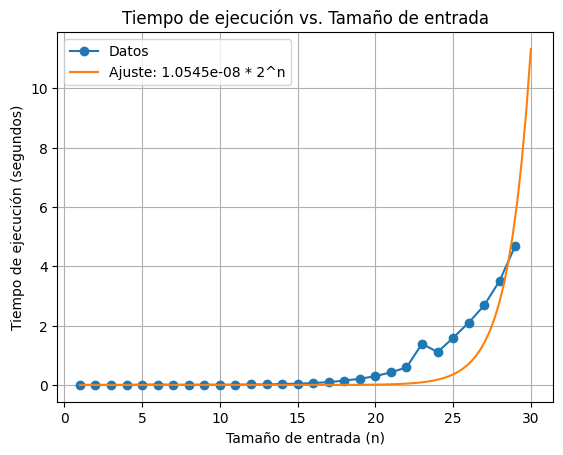

In [15]:
# Definir los tamaños de entrada
tamanos_entrada = list(range(1, 30))
tiempos_ejecucion = []

# Medir el tiempo de ejecución para cada tamaño de entrada
for n in tamanos_entrada:
    tiempo = medir_tiempo_ejecucion(n)
    tiempos_ejecucion.append(tiempo)
    print(f"Tamaño de entrada: {n}, Tiempo de ejecución: {tiempo:.4f} segundos")

# Graficar los resultados
plt.plot(tamanos_entrada, tiempos_ejecucion, marker='o', label='Datos')
plt.xlabel('Tamaño de entrada (n)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución vs. Tamaño de entrada')
plt.grid(True)

# Definir una función de la forma a * 2^n para el ajuste
def funcion_2n(x, a):
    return a * 2**x

# Ajustar la curva a los datos
popt, pcov = curve_fit(funcion_2n, tamanos_entrada, tiempos_ejecucion)

# Obtener el parámetro ajustado
a = popt[0]
print(f"Parámetro ajustado: a = {a:.4e}")

# Graficar los resultados y la curva ajustada
x_fit = np.linspace(1, 30, 100)
y_fit = funcion_2n(x_fit, a)

plt.plot(x_fit, y_fit, '-', label=f'Ajuste: {a:.4e} * 2^n')
plt.legend()
plt.show()

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

In [16]:
def generar_datos_aleatorios(num_tomas=30, num_actores=10, probabilidad_aparicion=0.6, semilla=42):
    """
    Genera una matriz de participación M para num_tomas y num_actores.
    
    Parámetros:
      num_tomas (int): Número total de tomas.
      num_actores (int): Número total de actores.
      probabilidad_aparicion (float): Probabilidad de que un actor participe en una toma.
      semilla (int): Semilla para reproducibilidad.
      
    Retorna:
      M (list of lists): Matriz de tamaño num_tomas x num_actores, donde cada celda es 1.0 o 0.0.
    """
    random.seed(semilla)  # Para reproducibilidad
    M = []  # Matriz de participación
    for t in range(num_tomas):
        fila = []
        for a in range(num_actores):
            # Con probabilidad 'probabilidad_aparicion', el actor aparece (valor 1.0), de lo contrario 0.0
            valor = 1.0 if random.random() < probabilidad_aparicion else 0.0
            fila.append(valor)
        M.append(fila)
    return M

def imprimir_matriz(M):
    """
    Imprime la matriz M en formato tabular.
    """
    num_actores = len(M[0])
    encabezado = "\t".join([f"Actor_{a+1}" for a in range(num_actores)])
    print("Toma\t" + encabezado)
    for i, fila in enumerate(M):
        fila_str = "\t".join(str(int(val)) for val in fila)
        print(f"Toma_{i+1}\t" + fila_str)

In [17]:
# Parámetros del juego de datos
num_tomas = 30
num_actores = 10
probabilidad_aparicion = 0.6  # Ajusta esta probabilidad para simular mayor o menor participación

# Generar datos aleatorios
M = generar_datos_aleatorios(num_tomas, num_actores, probabilidad_aparicion)

# Imprimir el juego de datos generado
print("Juego de Datos de Entrada (Matriz de Participación):")
imprimir_matriz(M)

Juego de Datos de Entrada (Matriz de Participación):
Toma	Actor_1	Actor_2	Actor_3	Actor_4	Actor_5	Actor_6	Actor_7	Actor_8	Actor_9	Actor_10
Toma_1	0	1	1	1	0	0	0	1	1	1
Toma_2	1	1	1	1	0	1	1	1	0	1
Toma_3	0	0	1	1	0	1	1	1	0	0
Toma_4	0	0	1	0	1	1	0	0	0	1
Toma_5	0	1	1	1	1	1	1	1	0	1
Toma_6	1	1	1	0	0	0	1	0	1	1
Toma_7	0	0	1	0	0	0	1	1	1	1
Toma_8	1	0	0	1	0	1	0	1	1	1
Toma_9	1	1	1	0	1	1	0	1	1	1
Toma_10	1	0	0	1	1	1	0	1	0	0
Toma_11	1	0	0	1	1	0	1	1	1	0
Toma_12	0	1	1	1	0	0	1	0	0	1
Toma_13	0	1	0	1	1	1	1	0	0	0
Toma_14	1	1	0	0	1	1	1	0	0	1
Toma_15	1	1	1	0	1	1	1	0	1	1
Toma_16	0	0	1	1	1	1	1	1	1	1
Toma_17	1	0	1	0	0	1	1	0	1	1
Toma_18	0	1	1	0	0	1	1	1	1	1
Toma_19	0	0	0	1	1	1	0	1	1	1
Toma_20	1	1	1	0	1	0	1	1	0	0
Toma_21	0	0	0	1	1	1	1	1	1	0
Toma_22	1	0	1	1	0	0	1	0	1	1
Toma_23	0	1	1	0	1	1	1	0	1	0
Toma_24	1	1	1	0	1	1	0	1	1	0
Toma_25	1	1	1	0	1	0	1	1	0	1
Toma_26	1	0	1	1	0	0	1	1	1	0
Toma_27	0	0	1	1	0	0	0	0	0	1
Toma_28	0	1	0	0	1	1	1	1	1	0
Toma_29	0	1	0	1	1	0	0	1	1	1
Toma_30	1	0	0	1	0	1	1	1	1	0


Aplica el algoritmo al juego de datos generado

Respuesta

In [20]:
## Genera las primeras 1000 particiones de 30 tomas en 5 grupos de hasta 6 tomas
partitions = particiones_aleatorias(n=30, max_tomas=6, max_partitions=3000)
dataframeM = pd.DataFrame(M, columns=[f"Actor_{i+1}" for i in range(num_actores)], index=[f"Toma_{i+1}" for i in range(num_tomas)])
## Encuentra la partición con el menor coste
min_cost = float('inf')
for i, partition in enumerate(partitions):
    cost, _ = funcion_coste(dataframeM, partition)
    if cost < min_cost:
        min_cost = cost
        best_partition = partition

for i, dia in enumerate(best_partition):
    print(f" Día {i+1}: tomas {dia}")
print("\nCoste total mínimo:", min_cost)

 Día 1: tomas [13, 3, 1, 8, 16, 25]
 Día 2: tomas [21, 7, 9, 6, 17, 22]
 Día 3: tomas [15, 11, 4, 24, 20, 26]
 Día 4: tomas [10, 27, 23, 14, 30, 28]
 Día 5: tomas [19, 12, 2, 18, 5, 29]

Coste total mínimo: 50


In [22]:
# Ejecutar la búsqueda local para minimizar el coste
particion_optima, coste_optimo = busqueda_local(dataframeM, best_partition, min_cost, max_iter=3000)

# Mostrar la solución encontrada
print("\nPartición óptima (días con números de tomas):")
for i, dia in enumerate(particion_optima):
    print(f" Día {i+1}: tomas {dia}")
print("\nCoste total mínimo:", coste_optimo)


Partición óptima (días con números de tomas):
 Día 1: tomas [13, 3, 1, 8, 16, 25]
 Día 2: tomas [21, 7, 9, 6, 17, 22]
 Día 3: tomas [15, 11, 4, 24, 20, 26]
 Día 4: tomas [10, 27, 23, 14, 30, 2]
 Día 5: tomas [19, 12, 28, 18, 5, 29]

Coste total mínimo: 49


Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

* [Algoritmos de Búsqueda Local Básicos](https://sci2s.ugr.es/sites/default/files/files/Teaching/GraduatesCourses/Algoritmica/Tema02-BusquedaLocal-12-13.pdf)
* [Explicando Backtracking | Fuerza Bruta Pero Elegante](https://youtu.be/ip2jC_kXGtg?si=w-9Lv5f7UTNTc50P)
* [Big O Notation en Python: Ejemplos prácticos para cada complejidad](https://elmundodelosdatos.com/big-o-notation-en-python-ejemplos-practicos-para-cada-complejidad/)

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

* Mejorar la eficiencia del algoritmo de búsqueda local: Implementar operadores de vecindad más eficientes y explorar distintas estrategias de búsqueda local para encontrar soluciones óptimas en menos tiempo. Por ejemplo, se puede implementar un algoritmo de búsqueda tabú para evitar caer en óptimos locales.

* Heurísticas y Metaheurísticas: Aplicar y combinar búsquedas locales, recocido simulado o algoritmos genéticos para obtener soluciones de buena calidad en menos tiempo.

* Escalabilidad y Validación: Probar el modelo con instancias de mayor tamaño y datos reales, y comparar el desempeño de distintos métodos para identificar los más robustos y eficientes.